# IMPORTING THE LIBRARIES 

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# READING THE CSV FILE

In [29]:
train = pd.read_csv('D:/ML/train1.csv')
meal = pd.read_csv('D:/ML/meal_info.csv')
centerinfo = pd.read_csv('D:/ML/fulfilment_center_info.csv')
test = pd.read_csv('D:/ML/test.csv')

# EXPLORATORY DATA ANALYSIS

In [30]:
display(train.head(5))
print('Shape:', train.shape)

display(meal.head(5))
print('Shape:', meal.shape)

display(centerinfo.head(5))
print('Shape:', centerinfo.shape)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885,136.83,152.29,0.0,0.0,177
1,1466964,1.0,55.0,1993,136.83,135.83,0.0,0.0,270
2,1346989,1.0,55.0,2539,134.86,135.86,0.0,0.0,189
3,1338232,1.0,55.0,2139,339.50,437.53,0.0,0.0,54
4,1448490,1.0,55.0,2631,243.50,242.50,0.0,0.0,40


Shape: (456548, 9)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


Shape: (51, 3)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


Shape: (77, 5)


# MERGING CSV

In [31]:
#merged the meal to train according to the meal_id in the train
train_meal = pd.merge(train, meal, on="meal_id", how="left")

#merged the train_meal with centerinfo according to the center_id in the train_meal
df = pd.merge(train_meal, centerinfo, on="center_id", how="left")

print("\nTrain + Meal")
display(train_meal.head(5))
print("\nTrain + Meal + Centerinfo")
display(df.head(5))
print("Shape : ", df.shape)


Train + Meal


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1.0,55.0,1885,136.83,152.29,0.0,0.0,177,Beverages,Thai
1,1466964,1.0,55.0,1993,136.83,135.83,0.0,0.0,270,Beverages,Thai
2,1346989,1.0,55.0,2539,134.86,135.86,0.0,0.0,189,Beverages,Thai
3,1338232,1.0,55.0,2139,339.50,437.53,0.0,0.0,54,Beverages,Indian
4,1448490,1.0,55.0,2631,243.50,242.50,0.0,0.0,40,Beverages,Indian



Train + Meal + Centerinfo


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1.0,55.0,1885,136.83,152.29,0.0,0.0,177,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1466964,1.0,55.0,1993,136.83,135.83,0.0,0.0,270,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1346989,1.0,55.0,2539,134.86,135.86,0.0,0.0,189,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1338232,1.0,55.0,2139,339.50,437.53,0.0,0.0,54,Beverages,Indian,647.0,56.0,TYPE_C,2.0
4,1448490,1.0,55.0,2631,243.50,242.50,0.0,0.0,40,Beverages,Indian,647.0,56.0,TYPE_C,2.0


Shape :  (456548, 15)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456537 non-null  float64
 2   center_id              456547 non-null  float64
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456540 non-null  float64
 7   homepage_featured      456535 non-null  float64
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456547 non-null  float64
 12  region_code            456547 non-null  float64
 13  center_type            456547 non-null  object 
 14  op_area                456547 non-nu

# CHECKING NULL VALUES & DROPING 

In [33]:
df.isnull().sum()

id                        0
week                     11
center_id                 1
meal_id                   0
checkout_price            0
base_price                0
emailer_for_promotion     8
homepage_featured        13
num_orders                0
category                  0
cuisine                   0
city_code                 1
region_code               1
center_type               1
op_area                   1
dtype: int64

In [34]:
df.isnull().any()

id                       False
week                      True
center_id                 True
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion     True
homepage_featured         True
num_orders               False
category                 False
cuisine                  False
city_code                 True
region_code               True
center_type               True
op_area                   True
dtype: bool

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [37]:
df['num_orders'].describe()

count    456517.000000
mean        261.875236
std         395.926371
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [38]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565170e+05,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000,456517.000000
mean,1.250096e+06,74.773781,82.103985,2024.328196,332.235779,354.154011,0.081149,0.109205,261.875236,601.556713,56.614174,4.083632
std,1.443545e+05,41.521916,45.974165,547.423743,152.938303,160.715372,0.273064,0.311897,395.926371,66.193515,17.641221,1.091669
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.125000e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.250183e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


# DROPPING COLUMNS

In [39]:
drop = ['center_id', 'meal_id']

display(df.drop(drop, axis=1).head(7))

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1.0,136.83,152.29,0.0,0.0,177,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1466964,1.0,136.83,135.83,0.0,0.0,270,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1346989,1.0,134.86,135.86,0.0,0.0,189,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1338232,1.0,339.50,437.53,0.0,0.0,54,Beverages,Indian,647.0,56.0,TYPE_C,2.0
4,1448490,1.0,243.50,242.50,0.0,0.0,40,Beverages,Indian,647.0,56.0,TYPE_C,2.0
5,1270037,1.0,251.23,252.23,0.0,0.0,28,Beverages,Indian,647.0,56.0,TYPE_C,2.0
6,1191377,1.0,183.36,184.36,0.0,0.0,190,Beverages,Italian,647.0,56.0,TYPE_C,2.0


In [40]:
df.dtypes

id                         int64
week                     float64
center_id                float64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders                 int64
category                  object
cuisine                   object
city_code                float64
region_code              float64
center_type               object
op_area                  float64
dtype: object

# DATA VISUALIZATION

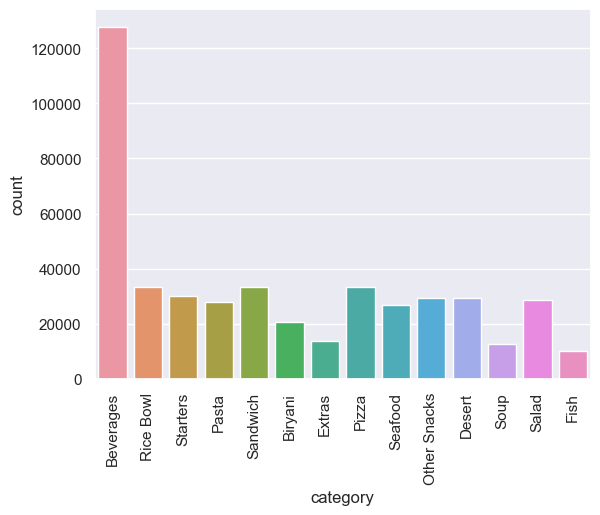

              category      Ratio
category                         
Beverages       127883  28.012757
Rice Bowl        33407   7.317800
Sandwich         33290   7.292171
Pizza            33135   7.258218
Starters         29940   6.558354
Other Snacks     29374   6.434372
Desert           29289   6.415752
Salad            28559   6.255846
Pasta            27694   6.066368
Seafood          26913   5.895290
Biryani          20610   4.514618
Extras           13561   2.970536
Soup             12675   2.776457
Fish             10187   2.231461


In [41]:
sns.countplot(x=df['category'], data=df)
plt.xticks(rotation=90)
plt.show(block=True)

category = pd.DataFrame({'category': df['category'].value_counts(),
                                 'Ratio': 100 * df['category'].value_counts() / len(df)})
print(category)


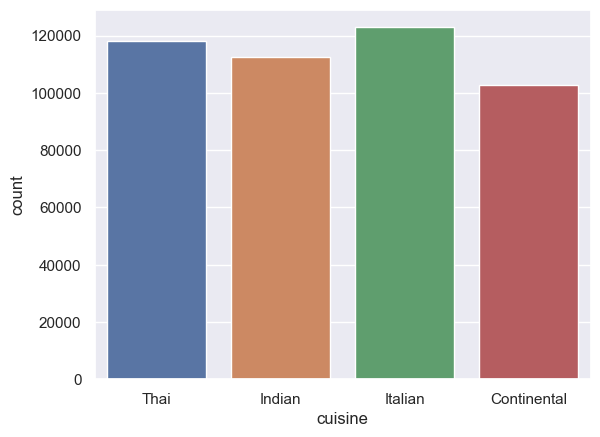

             cuisine      Ratio
cuisine                        
Italian       122924  26.926489
Thai          118205  25.892793
Indian        112600  24.665018
Continental   102788  22.515700


In [42]:
sns.countplot(x=df['cuisine'], data=df)
plt.show(block=True)

cuisine_summary = pd.DataFrame({'cuisine': df['cuisine'].value_counts(),
                                'Ratio': 100 * df['cuisine'].value_counts() / len(df)})
print(cuisine_summary)

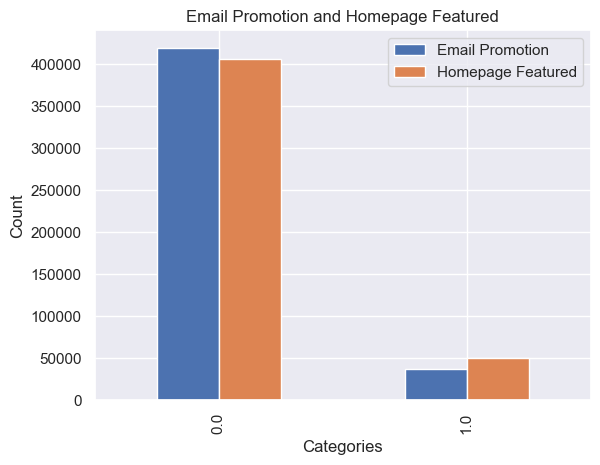

                       emailer_for_promotion      Ratio
emailer_for_promotion                                  
0.0                                   419471  91.885078
1.0                                    37046   8.114922 

                   homepage_featured      Ratio
homepage_featured                              
0.0                           406663  89.079487
1.0                            49854  10.920513


In [43]:
emailer_counts = df['emailer_for_promotion'].value_counts()
homepage_counts = df['homepage_featured'].value_counts()

data = pd.DataFrame({'Email Promotion': emailer_counts, 'Homepage Featured': homepage_counts})
data.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Email Promotion and Homepage Featured')
plt.show()

emailer_summary = pd.DataFrame({'emailer_for_promotion': df['emailer_for_promotion'].value_counts(),
                                'Ratio': 100 * df['emailer_for_promotion'].value_counts() / len(df)})
print(emailer_summary,"\n")
featured_summary = pd.DataFrame({'homepage_featured': df['homepage_featured'].value_counts(),
                                 'Ratio': 100 * df['homepage_featured'].value_counts() / len(df)})
print(featured_summary)



In [44]:
cols = df.columns.tolist()
print(cols)

['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [45]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area', 'homepage_featured', 'num_orders', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion']


In [46]:
df = df[cols]
df.head()

,id,week,category,cuisine,city_code,region_code,center_type,op_area,homepage_featured,num_orders,center_id,meal_id,checkout_price,base_price,emailer_for_promotion
0,1379560,1.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0,0.0,177,55.0,1885,136.83,152.29,0.0
1,1466964,1.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0,0.0,270,55.0,1993,136.83,135.83,0.0
2,1346989,1.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0,0.0,189,55.0,2539,134.86,135.86,0.0
3,1338232,1.0,Beverages,Indian,647.0,56.0,TYPE_C,2.0,0.0,54,55.0,2139,339.50,437.53,0.0
4,1448490,1.0,Beverages,Indian,647.0,56.0,TYPE_C,2.0,0.0,40,55.0,2631,243.50,242.50,0.0


In [47]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder() 
df['center_type'] = lb1.fit_transform(df['center_type'])
lb2 = LabelEncoder() 
df['category'] = lb1.fit_transform(df['category'])
lb3 = LabelEncoder()
df['cuisine'] = lb1.fit_transform(df['cuisine'])

In [48]:
df.head(20)

,id,week,category,cuisine,city_code,region_code,center_type,op_area,homepage_featured,num_orders,center_id,meal_id,checkout_price,base_price,emailer_for_promotion
0,1379560,1.0,0,3,647.0,56.0,2,2.0,0.0,177,55.0,1885,136.83,152.29,0.0
1,1466964,1.0,0,3,647.0,56.0,2,2.0,0.0,270,55.0,1993,136.83,135.83,0.0
2,1346989,1.0,0,3,647.0,56.0,2,2.0,0.0,189,55.0,2539,134.86,135.86,0.0
3,1338232,1.0,0,1,647.0,56.0,2,2.0,0.0,54,55.0,2139,339.50,437.53,0.0
4,1448490,1.0,0,1,647.0,56.0,2,2.0,0.0,40,55.0,2631,243.50,242.50,0.0
5,1270037,1.0,0,1,647.0,56.0,2,2.0,0.0,28,55.0,1248,251.23,252.23,0.0
6,1191377,1.0,0,2,647.0,56.0,2,2.0,0.0,190,55.0,1778,183.36,184.36,0.0
7,1499955,1.0,0,2,647.0,56.0,2,2.0,0.0,391,55.0,1062,182.36,183.36,0.0
8,1025244,1.0,0,2,647.0,56.0,2,2.0,0.0,472,55.0,2707,193.06,192.06,0.0
9,1054194,1.0,0,0,647.0,56.0,2,2.0,1.0,676,55.0,1207,325.92,384.18,0.0


In [49]:
df2 = df.drop(['id'],axis=1)
correlation = df2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

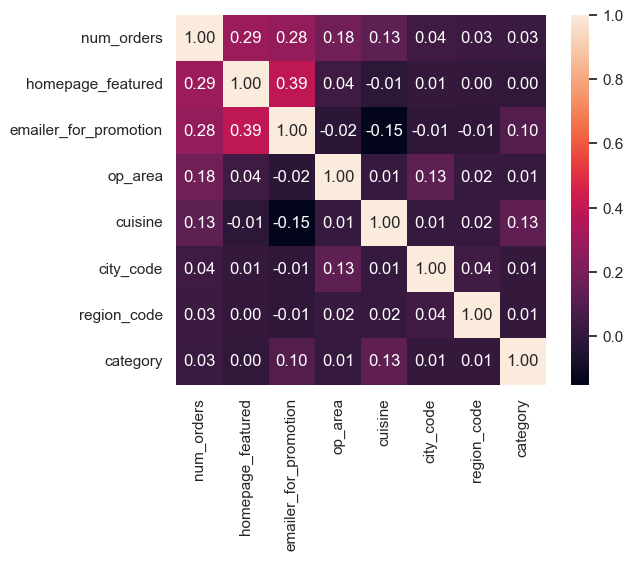

In [50]:
correlation_map = np.corrcoef(df2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',
                     yticklabels=columns.values, xticklabels=columns.values)

In [51]:
features = columns.drop(['num_orders'])
X = df[features].values
y = df['num_orders'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [54]:
# Decision Tree Regressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred_dt = DT.predict(X_test)
y_pred_dt[y_pred_dt < 0] = 0
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error
print('Decision Tree Regressor:')
print('R2 Score:', r2_score(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('RMSE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred_dt)))
print()

Decision Tree Regressor:
R2 Score: 0.6623336013596439
MSE: 53098.59626757705
RMSE: 62.92849853118743



In [58]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred[y_pred<0] = 0
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error
print('Random Forest Regressor:')
print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

Random Forest Regressor:
R2 Score: 0.6628700213181467
MSE: 53014.243347295094
RMSE: 62.91050540741675


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_gb[y_pred_gb<0] = 0
print('Gradient Boosting Regressor:')
print('R2 Score:', r2_score(y_test, y_pred_gb))
print('MSE:', mean_squared_error(y_test, y_pred_gb))
print('RMSE:', 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred_gb)))
print()

Linear Regression:
R2 Score: 0.17493541199845852
MSE: 129742.76276636528
RMSE: 130.03889123413418

Gradient Boosting Regressor:
R2 Score: 0.5546084044401127
MSE: 70038.560569941
RMSE: 96.63285723254508



In [ ]:
import pickle
pickle.dump(RF, open('fdemand.pkl','wb'))

In [ ]:
testfinal = pd.merge(test, meal, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, centerinfo, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id','center_id'],axis=1)

In [ ]:
Ib1 = LabelEncoder()
testfinal['center_type'] = Ib1.fit_transform(testfinal['center_type'])

Ib2 = LabelEncoder()
testfinal['category'] = Ib1.fit_transform(testfinal['category'])

Ib3 = LabelEncoder()
testfinal['cuisine'] = Ib1.fit_transform(testfinal['cuisine'])

In [ ]:
display(testfinal)

In [ ]:
tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]
testfinal


In [ ]:
X_test = testfinal[features].values

In [ ]:
RF.predict([[  1.,   0.,   1.,   0., 529.,  34.,  11.]])

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np

def predict_orders():
    # Get the input values from the entry fields
    featured = float(featured_var.get())
    emailer = float(emailer_var.get())
    op_area = float(op_area_var.get())
    cuisine = float(cuisine_var.get())
    city_code = float(city_code_var.get())
    region_code = float(region_code_var.get())
    category = float(category_var.get())

    # Perform prediction based on the inputs
    prediction = perform_prediction(featured, emailer, op_area, cuisine, city_code, region_code, category)




    
def perform_prediction(featured, emailer, op_area, cuisine, city_code, region_code, category):
    # Load the trained model
    model = pickle.load(open('fdemand.pkl', 'rb'))

    # Replace the following line with your actual new data
    new_data = np.array([[featured, emailer, op_area, cuisine, city_code, region_code, category]])

    # Perform prediction
    prediction = RF.predict(new_data)

    # Display the predicted number of orders
    messagebox.showinfo("Prediction", f"The predicted number of orders is: {prediction}")


# Create the tkinter window and widgets
window = tk.Tk()
window.title("Order Prediction")
window.geometry("800x800")

# Define the variables for the input fields
featured_var = tk.StringVar()
emailer_var = tk.StringVar()
op_area_var = tk.StringVar()
cuisine_var = tk.StringVar()
city_code_var = tk.StringVar()
region_code_var = tk.StringVar()
category_var = tk.StringVar()

# Create the input fields
featured_label = tk.Label(window, text="Featured (Yes(1) - No(0)):")
featured_label.pack()
featured_entry = tk.Entry(window, textvariable=featured_var)
featured_entry.pack()

emailer_label = tk.Label(window, text="Emailer (Yes(1) - No(0)):")
emailer_label.pack()
emailer_entry = tk.Entry(window, textvariable=emailer_var)
emailer_entry.pack()

op_area_label = tk.Label(window, text="Op Area (2 - 7):")
op_area_label.pack()
op_area_entry = tk.Entry(window, textvariable=op_area_var)
op_area_entry.pack()

cuisine_label = tk.Label(window, text="Cuisine (Thai(0)-Indian(1)-Italian(3)-Continental(4)):")
cuisine_label.pack()
cuisine_entry = tk.Entry(window, textvariable=cuisine_var)
cuisine_entry.pack()

city_code_label = tk.Label(window, text="City Code:")
city_code_label.pack()
city_code_entry = tk.Entry(window, textvariable=city_code_var)
city_code_entry.pack()

region_code_label = tk.Label(window, text="Region Code:")
region_code_label.pack()
region_code_entry = tk.Entry(window, textvariable=region_code_var)
region_code_entry.pack()

category_label = tk.Label(window, text="Category:")
category_label.pack()
category_entry = tk.Entry(window, textvariable=category_var)
category_entry.pack()

# Create the predict button
predict_button = tk.Button(window, text="Predict", command=predict_orders)
predict_button.pack()


# Start the tkinter event loop
window.mainloop()
